In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage import exposure
from sklearn.cluster import KMeans
from skimage import morphology
from scipy import ndimage as ndi
from skimage.measure import regionprops
from skimage import io
import warnings; warnings.simplefilter('ignore')
from pupil_seg import*
from tqdm.notebook import tqdm

In [2]:
# Load the video file
vid = io.imread('eyeTrackingCleanExample.mp4')
print(vid.shape)

(504, 1024, 1280, 3)


In [3]:
bbox = np.array([416, 454, 409, 310])
from tqdm.notebook import tqdm
cropped_frames = {}
for i in tqdm(range(vid.shape[0])):
    cropped_frames[i] = vid[i][bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

  0%|          | 0/504 [00:00<?, ?it/s]

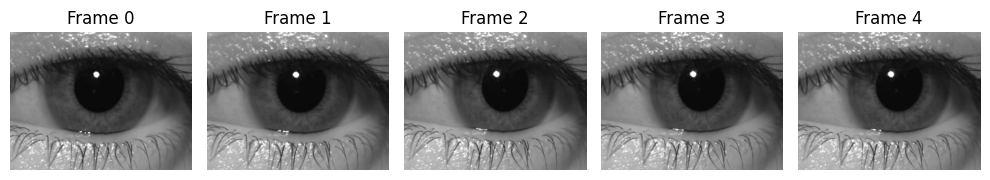

In [4]:
fig,ax = plt.subplots(1,5,figsize=(10,5))
for i in range(5):
    ax[i].imshow(cropped_frames[i])
    ax[i].set_title(f'Frame {i}')
    ax[i].axis('off')
plt.tight_layout()
plt.show();

In [5]:
cropped_img = np.array([cropped_frames[i] for i in range(vid.shape[0])])

In [6]:
processor = PupilSegmentation(sigma=2, n_clusters=5)

  0%|          | 0/504 [00:00<?, ?it/s]

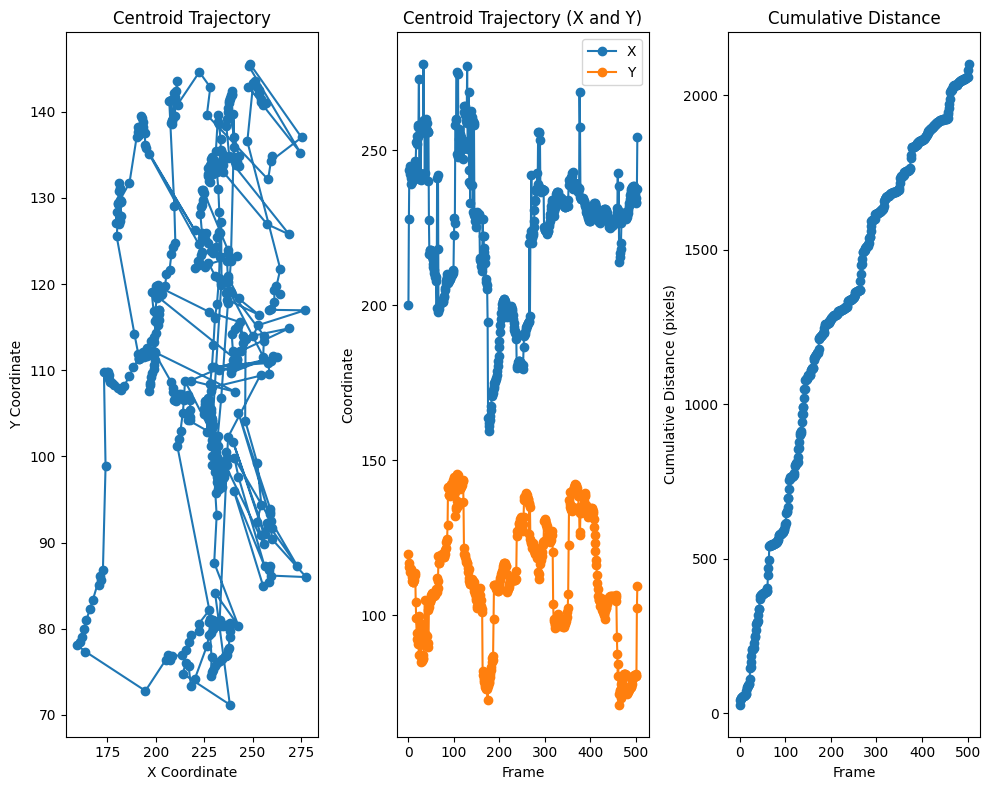

In [7]:
masks, centroids, distance = processor.process(cropped_img, output_path="D://portfolio//science_mltask//")

In [8]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

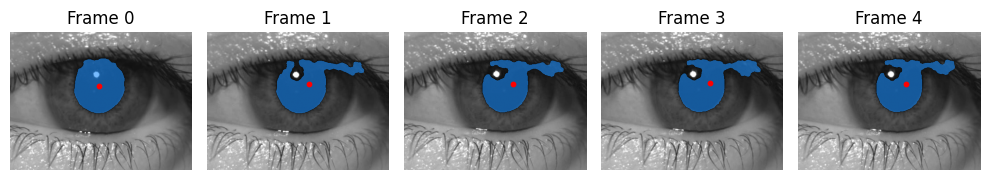

In [9]:
fig,ax = plt.subplots(1,5,figsize=(10,5))
for i in range(5):
    ax[i].imshow(cropped_img[i])
    show_mask(masks[i], ax[i])
    ax[i].set_title(f'Frame {i}')
    ax[i].scatter(centroids[i][1], centroids[i][0], c='r', s=10)
    ax[i].axis('off')
plt.tight_layout()
plt.show();

NameError: name 'skimage' is not defined